In [1]:
import SN_rates as sn
import numpy as np
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)

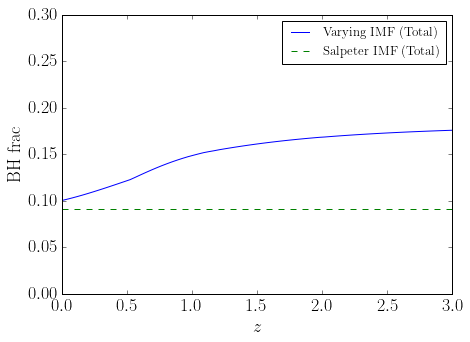

In [2]:
z = np.linspace(0,4, 100)

BHfrac_tot = sn.RCC_density(z,gtype='spiral') + sn.RCC_density(z,gtype='starburst') + sn.RCC_density(z,gtype='AGN spiral') + sn.RCC_density(z,gtype='AGN starburst')
BHfrac_sal_tot = sn.RCC_density(z,gtype='spiral',salpeter=True) + sn.RCC_density(z,gtype='starburst',salpeter=True) + sn.RCC_density(z,gtype='AGN spiral',salpeter=True) + sn.RCC_density(z,gtype='AGN starburst',salpeter=True)

BHfrac_spiral = sn.RCC_density(z,gtype='spiral', Mmin=40.)
BHfrac_starburst = sn.RCC_density(z,gtype='starburst', Mmin=40.)
BHfrac_AGNspiral = sn.RCC_density(z,gtype='AGN spiral', Mmin=40.)
BHfrac_AGNstarburst = sn.RCC_density(z,gtype='AGN starburst', Mmin=40.)
BHfrac = (BHfrac_spiral+BHfrac_starburst+BHfrac_AGNspiral+BHfrac_AGNstarburst) / BHfrac_tot

BHfrac_spiral_sal = sn.RCC_density(z,gtype='spiral',salpeter=True, Mmin=40.)
BHfrac_starburst_sal = sn.RCC_density(z,gtype='starburst',salpeter=True, Mmin=40.)
BHfrac_AGNspiral_sal = sn.RCC_density(z,gtype='AGN spiral',salpeter=True, Mmin=40.)
BHfrac_AGNstarburst_sal = sn.RCC_density(z,gtype='AGN starburst',salpeter=True, Mmin=40.) 
BHfrac_sal = (BHfrac_spiral_sal+BHfrac_starburst_sal+BHfrac_AGNspiral_sal+BHfrac_AGNstarburst_sal) / BHfrac_sal_tot

plt.figure(figsize=(7,5))

plt.plot(z,BHfrac,'-', color='blue',label='Varying IMF (Total)')
plt.plot(z,BHfrac_sal,'--', color='green', label='Salpeter IMF (Total)')

plt.xlim(0,3.0)
plt.ylim(0,0.3)
plt.legend(loc='upper right', fontsize=13, ncol=1)
plt.xlabel(r'$z$')
plt.ylabel('BH frac')
plt.savefig('../plots/BHfrac.pdf', bbox_inches='tight')
plt.show()

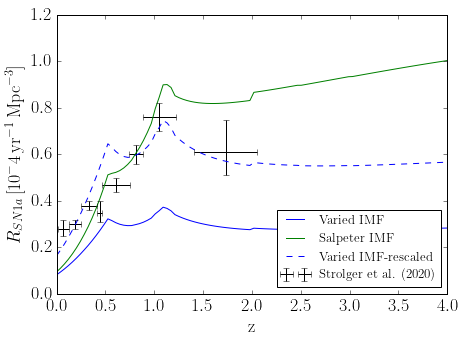

In [8]:
z = np.linspace(0.00000001,4, 100)

rhoSF_spiral = sn.RSF_density(z,gtype='spiral')
rhoSF_starburst = sn.RSF_density(z,gtype='starburst')
rhoSF_AGNspiral = sn.RSF_density(z,gtype='AGN spiral')
rhoSF_AGNstarburst = sn.RSF_density(z,gtype='AGN starburst')
rhoSF = (rhoSF_spiral+rhoSF_starburst+rhoSF_AGNspiral+rhoSF_AGNstarburst)

rhoSF_spiral_sal = sn.RSF_density(z,gtype='spiral',usesalpeter=True)
rhoSF_starburst_sal = sn.RSF_density(z,gtype='starburst',usesalpeter=True)
rhoSF_AGNspiral_sal = sn.RSF_density(z,gtype='AGN spiral',usesalpeter=True)
rhoSF_AGNstarburst_sal = sn.RSF_density(z,gtype='AGN starburst',usesalpeter=True)
rhoSF_sal = (rhoSF_spiral_sal+rhoSF_starburst_sal+rhoSF_AGNspiral_sal+rhoSF_AGNstarburst_sal)

h0 = 0.678*1.019e-12
OmegaM = 0.308
OmegaL = 1-OmegaM
t = 2/(3*np.sqrt(OmegaL)*100*h0) * (np.arctanh((OmegaM/OmegaL + 1)**(-1/2)) - np.arctanh((OmegaM/OmegaL * (z+1)**3 + 1)**(-1/2)))

fftconv = np.fft.irfft(np.fft.rfft(rhoSF) * np.fft.rfft(t**-1/10))
fftconvsal = np.fft.irfft(np.fft.rfft(rhoSF_sal) * np.fft.rfft(t**-1/10))

sn1az, sn1azerr, sn1arate, sn1arateerrminus, sn1arateerrplus = np.loadtxt('../Data/sn1a.txt', unpack=True)

plt.figure(figsize = (7,5))
plt.plot(z, fftconv*1e4, color = 'blue', label='Varied IMF')
plt.plot(z, fftconvsal*1e4, color = 'green', label='Salpeter IMF')
plt.plot(z, fftconv*2*1e4, color = 'blue', ls = '--', label='Varied IMF-rescaled')
plt.errorbar(sn1az, sn1arate, xerr=sn1azerr, yerr = (sn1arateerrminus, sn1arateerrplus), color = 'black', ls='none', label='Strolger et al. (2020)')

plt.xlabel(r'z')
plt.ylabel(r'$R_{SN1a} \, \mathrm{[10^-4 \, yr^{-1} \, Mpc^{-3}]} $')
plt.legend(loc='lower right', fontsize=13)
plt.savefig('../plots/SN1a.pdf')
plt.show()

C:\Users\Josh\Documents\Texas\DSNB\Python Notebooks\SN_rates.py:82: RuntimeWarning: invalid value encountered in double_scalars
  return Norm*(1+a)**(1+a)*E**a*np.exp(-1*(1+a)*E/Eav)/gamma(1+a)/(Eav**(2+a))
C:\Users\Josh\Documents\Texas\DSNB\Python Notebooks\SN_rates.py:82: RuntimeWarning: overflow encountered in exp
  return Norm*(1+a)**(1+a)*E**a*np.exp(-1*(1+a)*E/Eav)/gamma(1+a)/(Eav**(2+a))


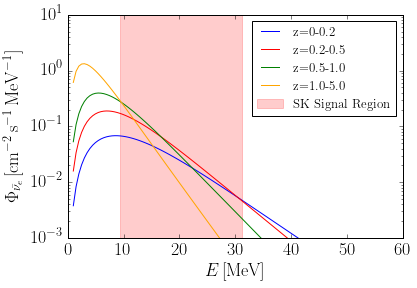

In [11]:
E = np.linspace(1,50,100)*sn.MeV

DSNB_spiral0 = sn.DSNB_galaxy(E,gtype='spiral', SFR2alpha=2.6, zmin=0.0, zmax=0.2)
DSNB_starburst0 = sn.DSNB_galaxy(E,gtype='starburst', SFR2alpha=2.6, zmin=0.0, zmax=0.2)
DSNB_AGNspiral0 = sn.DSNB_galaxy(E,gtype='AGN spiral', SFR2alpha=2.6, zmin=0.0, zmax=0.2)
DSNB_AGNstarburst0 = sn.DSNB_galaxy(E,gtype='AGN starburst', SFR2alpha=2.6, zmin=0.0, zmax=0.2)
DSNB0 = DSNB_spiral0+DSNB_starburst0+DSNB_AGNspiral0+DSNB_AGNstarburst0

DSNB_spiral1 = sn.DSNB_galaxy(E,gtype='spiral', SFR2alpha=2.6, zmin=0.2, zmax=0.5)
DSNB_starburst1 = sn.DSNB_galaxy(E,gtype='starburst', SFR2alpha=2.6, zmin=0.2, zmax=0.5)
DSNB_AGNspiral1 = sn.DSNB_galaxy(E,gtype='AGN spiral', SFR2alpha=2.6, zmin=0.2, zmax=0.5)
DSNB_AGNstarburst1 = sn.DSNB_galaxy(E,gtype='AGN starburst', SFR2alpha=2.6, zmin=0.2, zmax=0.5)
DSNB1 = DSNB_spiral1+DSNB_starburst1+DSNB_AGNspiral1+DSNB_AGNstarburst1

DSNB_spiral2 = sn.DSNB_galaxy(E,gtype='spiral', SFR2alpha=2.6, zmin=0.5, zmax=1.0)
DSNB_starburst2 = sn.DSNB_galaxy(E,gtype='starburst', SFR2alpha=2.6, zmin=0.5, zmax=1.0)
DSNB_AGNspiral2 = sn.DSNB_galaxy(E,gtype='AGN spiral', SFR2alpha=2.6, zmin=0.5, zmax=1.0)
DSNB_AGNstarburst2 = sn.DSNB_galaxy(E,gtype='AGN starburst', SFR2alpha=2.6, zmin=0.5, zmax=1.0)
DSNB2 = DSNB_spiral2+DSNB_starburst2+DSNB_AGNspiral2+DSNB_AGNstarburst2

DSNB_spiral3 = sn.DSNB_galaxy(E,gtype='spiral', SFR2alpha=2.6, zmin=1.0, zmax=5.0)
DSNB_starburst3 = sn.DSNB_galaxy(E,gtype='starburst', SFR2alpha=2.6, zmin=1.0, zmax=5.0)
DSNB_AGNspiral3 = sn.DSNB_galaxy(E,gtype='AGN spiral', SFR2alpha=2.6, zmin=1.0, zmax=5.0)
DSNB_AGNstarburst3 = sn.DSNB_galaxy(E,gtype='AGN starburst', SFR2alpha=2.6, zmin=1.0, zmax=5.0)
DSNB3 = DSNB_spiral3+DSNB_starburst3+DSNB_AGNspiral3+DSNB_AGNstarburst3

plt.figure(figsize=(7,5))
fig, ax = plt.subplots()

plt.axvspan(9.3, 31.3, alpha=0.2, color='red', label='SK Signal Region')

plt.plot(E, DSNB0, '-', color='blue',label='z=0-0.2')
plt.plot(E, DSNB1, '-', color='red',label='z=0.2-0.5')
plt.plot(E, DSNB2, '-', color='green',label='z=0.5-1.0')
plt.plot(E, DSNB3, '-', color='orange',label='z=1.0-5.0')

plt.yscale('log')
plt.xlim(0,60)
plt.ylim(1e-3, 10e0)
plt.legend(loc='upper right', fontsize=13)
plt.xlabel(r'$E \, \mathrm{[MeV]}$')
plt.ylabel(r'$\Phi_{\bar{\nu_e}} \, \mathrm{[cm^{-2} \, s^{-1} \, MeV^{-1}]} $')
plt.savefig('../plots/DSNB_z.pdf', bbox_inches='tight')
plt.show()